In [1]:
import sys, os
sys.path.append(f'../../code')
path_to_json = os.getcwd()

from IPython.display import display, Markdown

In [2]:
import json
def load_case(path):
    display(Markdown(f'## {path}'))
    with open(path, 'r+') as file: bundle = json.load(file)
    print('Temperature:', bundle['temperature'])
    return bundle

display(Markdown('# Files'))
json_files_mc = sorted([pos_json for pos_json in os.listdir(path_to_json) if pos_json.endswith('.json') and pos_json.startswith('mc-hT')],
                       reverse = True)
json_files_alg1 = sorted([pos_json for pos_json in os.listdir(path_to_json) if pos_json.endswith('.json') and pos_json.startswith('a1-hT')],
                         reverse = True)

print("MC: ", json_files_mc)
print("A1: ", json_files_alg1)

mc = load_case(json_files_mc[0])
alg1 = load_case(json_files_alg1[0])

# Files

MC:  ['mc-hT.json']
A1:  ['a1-hT.json']


## mc-hT.json

Temperature: 10


## a1-hT.json

Temperature: 10


Generating theoretical configurations: 100%|███| 8/8 [00:00<00:00, 7989.15it/s]


[33211.9973075675, 66788.0026924325]


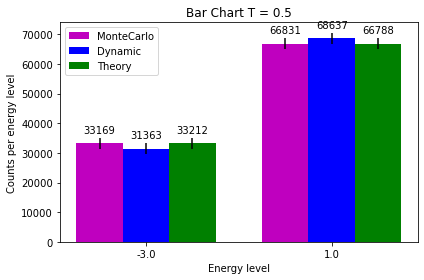

In [3]:
import ising
from ising import *
import matplotlib.pyplot as plt

mc_m_counts = count_variables(mc["magnetization_sample"])
alg1_m_counts = count_variables(alg1["magnetization_sample"])
mc_engy_counts = count_variables(mc["energy_sample"])
alg1_engy_counts = count_variables(alg1["energy_sample"])

chain = Chain(size=alg1["number of spins"], temperature = alg1["temperature"])
n_samples = len(alg1["energy_sample"])
theory_engy, theory_m = theoretical_distributions(chain)
theory_engy_counts, multinom_avg, multinom_std = theoretical_quantities(n_samples, theory_engy)
multiplicity_mc, std_mc, mc_engy_counts = std_algorithms(mc_engy_counts, multinom_avg, theory_engy, multinom_std)
multiplicity_alg1, std_alg1, alg1_engy_counts = std_algorithms(alg1_engy_counts, multinom_avg, theory_engy, multinom_std)

fig, ax = plt.subplots()
labels = mc_engy_counts.keys()
x = np.arange(len(labels)) 
width = 0.25
rects1 = ax.bar(x, list(mc_engy_counts.values()), width, yerr=std_mc, align='center',
                label='MonteCarlo', color='m')
rects2 = ax.bar(x + width, list(alg1_engy_counts.values()), width, yerr=std_alg1, align='center',
                label='Dynamic', color='b')
print(theory_engy_counts)
theory_engy_counts_adjusted = [round(counts) for counts in theory_engy_counts]
rects3 = ax.bar(x + width * 2, theory_engy_counts_adjusted, width, yerr=multinom_std, align='center',
                label='Theory', color='g')

ax.set_title('Bar Chart T = 0.5')
ax.set_ylabel('Counts per energy level')
ax.set_xlabel('Energy level')
ax.set_xticks(x + width)
ax.set_xticklabels([i for i in labels])
ax.legend()
ax.bar_label(rects1, padding=3)
ax.bar_label(rects2, padding=3)
ax.bar_label(rects3, padding=3)
fig.tight_layout()

[33211.9973075675, 66788.0026924325]


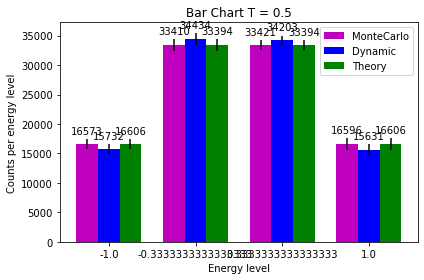

In [4]:
theory_m_counts, multinom_avg, multinom_std = theoretical_quantities(n_samples, theory_m)
multiplicity_mc, std_mc, mc_m_counts = std_algorithms(mc_m_counts, multinom_avg, theory_m, multinom_std)
multiplicity_alg1, std_alg1, alg1_m_counts = std_algorithms(alg1_m_counts, multinom_avg, theory_m, multinom_std)

fig, ax = plt.subplots()
labels = mc_m_counts.keys()
x = np.arange(len(labels)) 
width = 0.25
rects1 = ax.bar(x, list(mc_m_counts.values()), width, yerr=std_mc, align='center',
                label='MonteCarlo', color='m')
rects2 = ax.bar(x + width, list(alg1_m_counts.values()), width, yerr=std_alg1, align='center',
                label='Dynamic', color='b')
print(theory_engy_counts)
theory_m_counts_adjusted = [round(counts) for counts in theory_m_counts]
rects3 = ax.bar(x + width * 2, theory_m_counts_adjusted, width, yerr=multinom_std, align='center',
                label='Theory', color='g')

ax.set_title('Bar Chart T = 0.5')
ax.set_ylabel('Counts per energy level')
ax.set_xlabel('Energy level')
ax.set_xticks(x + width)
ax.set_xticklabels([i for i in labels])
ax.legend()
ax.bar_label(rects1, padding=3)
ax.bar_label(rects2, padding=3)
ax.bar_label(rects3, padding=3)
fig.tight_layout()

Text(0.5, 1.0, 'M Correlation MonteCarlo')

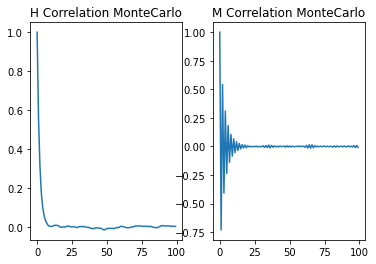

In [5]:
mc_engy_corr = acrl(mc["energy_sample"], 100)
mc_m_corr = acrl(mc["magnetization_sample"], 100)
fig_kde, axes = plt.subplots(1, 2)
axes[0].plot(mc_engy_corr)
axes[0].set_title("H Correlation MonteCarlo")
axes[1].plot(mc_m_corr)
axes[1].set_title("M Correlation MonteCarlo")

Text(0.5, 1.0, 'M Correlation Alg1')

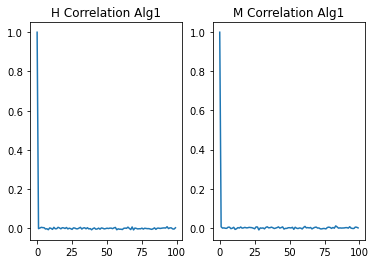

In [6]:
alg1_engy_corr = acrl(alg1["energy_sample"], 100)
alg1_m_corr = acrl(alg1["magnetization_sample"], 100)
fig_kde, axes = plt.subplots(1, 2)
axes[0].plot(alg1_engy_corr)
axes[0].set_title("H Correlation Alg1")
axes[1].plot(alg1_m_corr)
axes[1].set_title("M Correlation Alg1")

In [7]:
#Reject lack of fit iff distance < upper_bound
#H0: distance >= eps, Ha: dist < eps
print(f'Energy MC - Theory:', test_theoretical(f_obs=list(mc_engy_counts.values()), theory_prob=theory_engy[:,1], n_samples=n_samples,eps=0.05))
print(f'Magnetization MC - Theory:', test_theoretical(f_obs=list(mc_m_counts.values()), theory_prob=theory_m[:,1], n_samples=n_samples,eps=0.05))
#Reject lack of fit iff distance < upper_bound
#H0: distance >= eps, Ha: dist < eps
print(f'Energy Alg1 - Theory:', test_theoretical(f_obs=list(alg1_engy_counts.values()), theory_prob=theory_engy[:,1], n_samples=n_samples,eps=0.05))
print(f'Magnetization Alg1 - Theory:', test_theoretical(f_obs=list(alg1_m_counts.values()), theory_prob=theory_m[:,1], n_samples=n_samples,eps=0.05))

Energy MC - Theory: {'Distance': 3.6975369161078083e-07, 'Upper_bound': 0.002495788045426848, 'Reject': True}
Magnetization MC - Theory: {'Distance': 2.173768458053683e-07, 'Upper_bound': 0.0024977356695164484, 'Reject': True}
Energy Alg1 - Theory: {'Distance': 0.0006837582086783719, 'Upper_bound': 0.0023215109934078683, 'Reject': True}
Magnetization Alg1 - Theory: {'Distance': 0.00034505720433918334, 'Upper_bound': 0.0024101430270325984, 'Reject': True}


In [8]:
#H0: the two samples came from the same distribution
print(f'Energy:', z_test(f1=list(mc_engy_counts.values()), f2=list(alg1_engy_counts.values()), n_samples=len(mc["energy_sample"])))
print(f'Magnetization:', z_test(f1=list(mc_m_counts.values()), f2=list(alg1_m_counts.values()), n_samples=len(mc["energy_sample"])))

Energy: 0.9999999999998884
Magnetization: 0.9999999999999443
